In [1]:
import pandas as pd

In [8]:
df=pd.read_csv('../bigdata/pima-indians-diabetes.csv',
               names=["pregnant","plasma","pressure","thickness","insulin","BMI","pedigree","age","class"])
# class: 당뇨병 발병 여부

In [9]:
#데이터의 첫 5줄
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [10]:
#데이터의 전반적인 정보
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [11]:
#정보별 특징을 더 자세히 보기
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [12]:
print(df[['pregnant','class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
5           5      0
6           3      1
7          10      0
8           2      1
9           8      1
10          4      0
11         10      1
12         10      0
13          1      1
14          5      1
15          7      1
16          0      1
17          7      1
18          1      0
19          1      1
20          3      0
21          8      0
22          7      1
23          9      1
24         11      1
25         10      1
26          7      1
27          1      0
28         13      0
29          5      0
..        ...    ...
738         2      0
739         1      1
740        11      1
741         3      0
742         1      0
743         9      1
744        13      0
745        12      0
746         1      1
747         1      0
748         3      1
749         6      1
750         4      1
751         1      0
752         3      0
753         0

In [13]:
# 임신 횟수 당 당뇨병 발병 확률
print(df[['pregnant','class']].groupby(['pregnant'],as_index=False).mean().sort_values(by='pregnant',ascending=True))
# groupby: 'pregnant'정보를 기분으로 새 그룹 생성
# as_index=False: pregnant 옆에 새로운 index 생성

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns # 미세한 그래프를 그릴 수 있도록 도와주는 라이브러리

In [16]:
# 그래프의 사이즈 결정
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

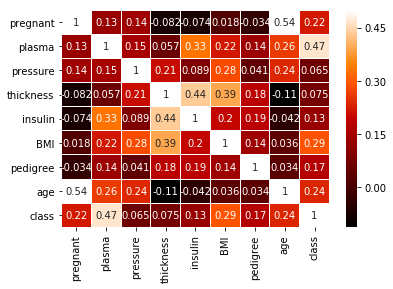

In [17]:
#그래프로 표현
sns.heatmap(df.corr(),linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
#heatmap: 두 항목씩 짝을 지은 뒤 각각 어떤 패턴으로 변화하는지를 관찰하는 함수
#두 항목이 전혀 다른 패턴으로 변화하고 있으면 0을, 서로 비슷한 패턴으로 변할수록 1에 가까운 값을 출력

In [18]:
#vmax: 색상의 밝기를 조절하는 인자
#cmap:미리 정해진 matplotlib색상의 설정값을 불러옴

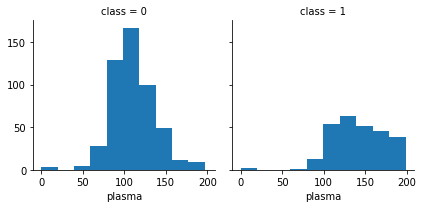

In [21]:
#plasma 와 class 항목만 따로 떼어서 두 항목 간의 관계를 그래프로 표현(상관관계가 제일 높음)
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()